In [4]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [11]:
import os
df = spark\
        .read\
        .options(header='true', inferschema='true', delimiter=',')\
        .csv('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv')


In [13]:
df.show(5)

+----------+-----+
|      date|count|
+----------+-----+
|2018-01-01| 4950|
|2018-01-02| 7136|
|2018-01-03| 7156|
|2018-01-04| 7102|
|2018-01-05| 7705|
+----------+-----+
only showing top 5 rows



### 문제 1-1: 년도별 대여건수 합계

In [17]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- count: integer (nullable = true)



In [27]:
from pyspark.sql.functions import to_date

df=df.withColumn('date2', to_date(df['date'], 'yyyy-MM-dd'))

In [31]:
from pyspark.sql.functions import to_date, col, year
df = df.withColumn("date2", to_date(col("date2"), "yyyy-MM-dd"))\
    .withColumn('year', year("date2"))

In [39]:
df.groupBy('year').agg({"count":"sum"}).show()

+----+----------+
|year|sum(count)|
+----+----------+
|2018|  10124874|
|2019|   1871935|
+----+----------+



### 문제 1-2: 년도별, 월별 대여건수 합계

In [62]:
from pyspark.sql.functions import to_date, col, year, month
df = df.withColumn("date2", to_date(col("date2"), "yyyy-MM-dd"))\
    .withColumn('month', month("date2"))

In [137]:
_df = df.groupBy('month').pivot('year').agg({"count":"sum"}).orderBy(asc("month")).na.fill(0)

In [138]:
_df.show()

+-----+-------+------+
|month|   2018|  2019|
+-----+-------+------+
|    1| 164367|495573|
|    2| 168741|471543|
|    3| 462661|904819|
|    4| 687885|     0|
|    5| 965609|     0|
|    6|1207123|     0|
|    7|1100015|     0|
|    8|1037505|     0|
|    9|1447993|     0|
|   10|1420621|     0|
|   11| 961532|     0|
|   12| 500822|     0|
+-----+-------+------+



### 문제 1-3: 년도별, 월별 대여건수 그래프

In [169]:
import pandas as pd
s4 = _df.toPandas()
_df=_df.drop('month')
_df.show()
s3= _df.toPandas()

+-------+------+
|   2018|  2019|
+-------+------+
| 164367|495573|
| 168741|471543|
| 462661|904819|
| 687885|     0|
| 965609|     0|
|1207123|     0|
|1100015|     0|
|1037505|     0|
|1447993|     0|
|1420621|     0|
| 961532|     0|
| 500822|     0|
+-------+------+



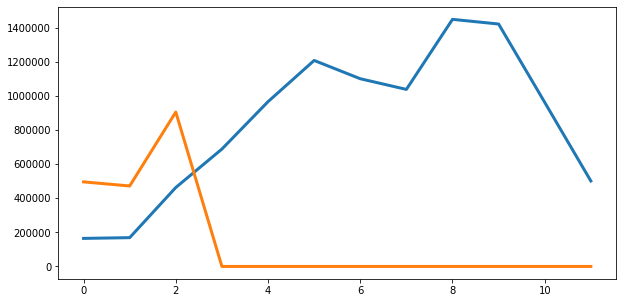

In [184]:
import matplotlib.pyplot as plt
# s3.plot(kind='line',x='month',y='2018')

fig = plt.figure(figsize=(10, 5))
ax1 = plt.plot(s3, linewidth=3.0)

In [1]:
s3.plot(kind='line')

NameError: name 's3' is not defined